# 1) **Tabular Data Analysis** ✅

The data collected is of the tabular format as shown below.

|Activity|Type|Money Spent|
|--------|----|-----------|
|        |    |           |
|        |    |           |

In [34]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data = pd.read_csv("/content/kanyakumari_trip_dataanalytics.csv")
df = data.copy()
data.head()

,Activity,Type,Money Spend
0,Nagarcoil Express,transportation,365
1,Local Bus,transportation,21
2,Nagarcoil to Kanyakumari Bus,transportation,20
3,"Dinner @ RHR, Coimbatore",food,118
4,Water bottle,food,15


In [36]:
data.sort_values(by='Money Spend',ascending=False)

,Activity,Type,Money Spend
5,Room,shelter,1200
25,Coimbatore Bus,transportation,860
21,"Lunch @ Coral Restaurant, Annai Resort",food,550
13,Lunch @ The Curry,food,541
17,Dinner,food,400
0,Nagarcoil Express,transportation,365
3,"Dinner @ RHR, Coimbatore",food,118
20,Lemurian Park Games,sight seeing,100
24,Dinner,food,90
6,Breakfast,food,70


### Top Activity Types w.r.t Money spent

In [37]:
data.groupby('Type')['Money Spend'].sum().sort_values(ascending=False)

Type
food              1944
transportation    1316
shelter           1200
sight seeing       250
shopping           100
others              55
Name: Money Spend, dtype: int64

### Top 3 Activties by Cost

In [38]:
data.groupby('Activity')['Money Spend'].sum().sort_values(ascending=False).head(3)

Activity
Room                                       1200
Coimbatore Bus                              860
Lunch @ Coral Restaurant, Annai Resort      550
Name: Money Spend, dtype: int64

### Top 3 Least priced Activities

In [39]:
data.groupby('Activity')['Money Spend'].sum().sort_values(ascending=False).tail(3)

Activity
Sunset view point     0
Triveni Sangamam      0
Kanyakumari temple    0
Name: Money Spend, dtype: int64

### Free to enjoy activities

In [40]:
data[data["Money Spend"]==0]

,Activity,Type,Money Spend
9,Kanyakumari Pier,sight seeing,0
10,Kanyakumari temple,sight seeing,0
11,Kamarajar Museum,sight seeing,0
27,Triveni Sangamam,sight seeing,0
28,Sunrise view point,sight seeing,0
29,Sunset view point,sight seeing,0


In [41]:
data['Money Spend'].describe()

count      31.000000
mean      156.935484
std       281.032612
min         0.000000
25%        12.500000
50%        50.000000
75%        95.000000
max      1200.000000
Name: Money Spend, dtype: float64

### Expenditure Distribution Analysis

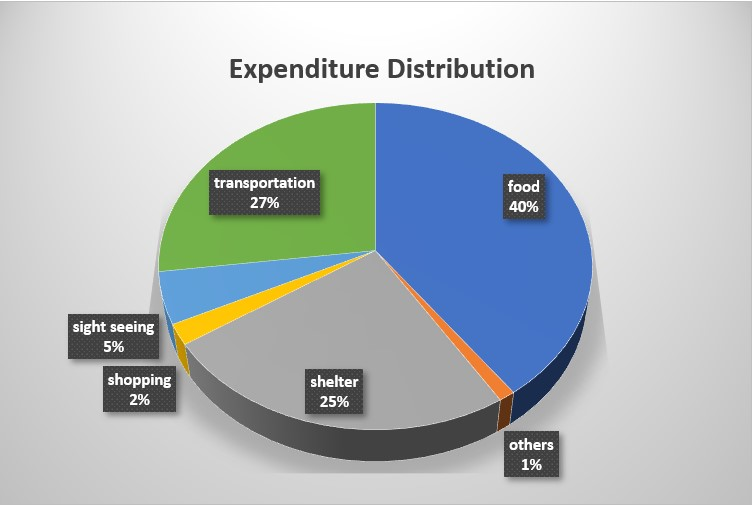

### Top 10 Costly Activities 

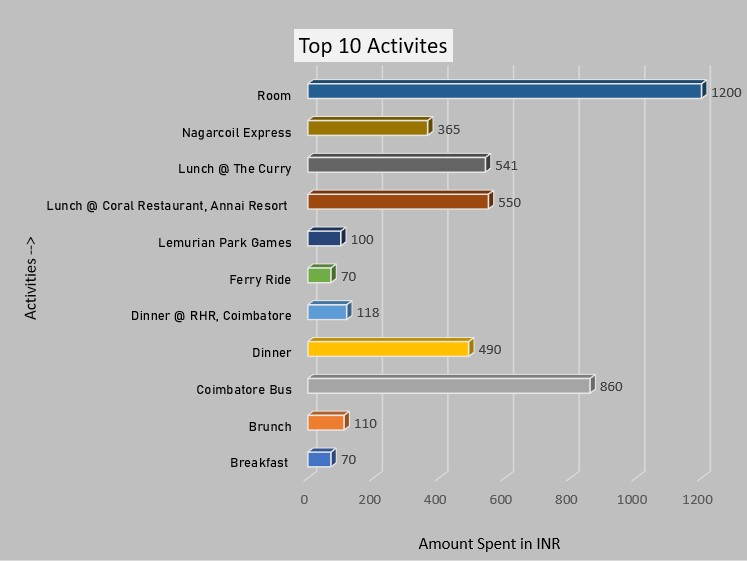

# 2) **Text Data Analytics** ✅


*   Museums visited
*   Restaurants visited



***2.1) Museums Visited in Kanyakumari*** : 🏦

In [42]:
def museumNameExtractor(string):
  refString = 'museum'
  if refString in string.lower():
    return string
  else:
    return -1

In [43]:
lst = []
for sent in data['Activity']:
  if museumNameExtractor(sent) != -1:
    lst.append(sent)

In [44]:
", ".join(lst)

'Kamarajar Museum, Gandhi Museum, Government Museum'

***2.2) Hotels / Restaurants Visited*** 🍕

In [45]:
# We need to extract data after @ symbol in the above data
def restaurantNameExtractor(string):
  if ('@' in string):
    indexVal_of_at = string.index("@")
    restaurantName = string[indexVal_of_at+1:].strip()
  else:
    restaurantName = -1
  return restaurantName

In [46]:
lst = []
# Filter the rows with Type == "food"
df_food = data[data["Type"]=="food"]

# Iterate and search for values that passes the condition defined
for sent in df_food['Activity']:
  val = restaurantNameExtractor(sent)
  if val != -1:
    lst.append(val)

# print the extracted restaurant names as list
print("Restaurants I visited :")
print(lst)

Restaurants I visited :
['RHR, Coimbatore', 'The Curry', 'Coral Restaurant, Annai Resort']


# 3) **Image Data Analytics** ✅

In [47]:
# total number of photos/images taken
# total number of videos taken
# clustering similar images
# image cloud
# storing images in python: https://realpython.com/storing-images-in-python/

In [48]:
filespath = "/content/drive/MyDrive/Videos Travel"
print("Number of files in the folder:",len(os.listdir(filespath)))

Number of files in the folder: 136


In [49]:
Set = set()
for filename in os.listdir(filespath):
  val = filename.split('.')[-1]
  Set.add(val)

print('Available file extensions:',Set)

Available file extensions: {'jpg', 'avi', 'mp4'}


### 3.3) Clustering Images based on Visual Similarity 🍭

In [17]:
# article link: https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34

In [18]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
from random import randint
import pickle

In [19]:
path = r"/content/drive/MyDrive/Videos Travel"
# change the working directory to the path where the images are located
os.chdir(path)
# this list holds all the image filename
images = []
# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the flowers list
            images.append(file.name)

In [20]:
print(images[:10])

['IMG20220319192952.jpg', 'IMG20220319061147.jpg', 'IMG20220319193755.jpg', 'IMG20220319085218.jpg', 'IMG20220320101856.jpg', 'IMG20220320094150.jpg', 'IMG20220319193540.jpg', 'IMG20220319160027.jpg', 'IMG20220319060254.jpg', 'IMG20220319193457.jpg']


In [21]:
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    img = load_img(file, target_size=(224,224))
    img = np.array(img)
    reshaped_img = img.reshape(1,224,224,3) 
    imgx = preprocess_input(reshaped_img)
    features = model.predict(imgx, use_multiprocessing=True)
    return features

553476096/553467096 [==============================] - 3s 0us/step


In [22]:
p = "features.pkl"
data = {}

# lop through each image in the dataset
for img in images:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(img,model)
        data[img] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)
          
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

Text(0, 0.5, 'Sum of squared distance')

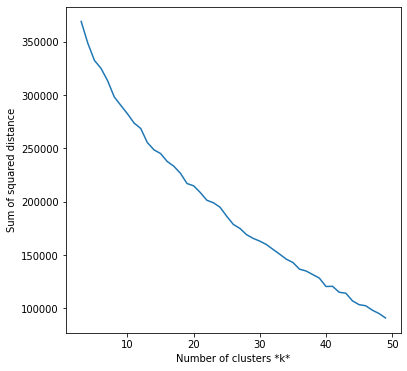

In [23]:
unique_labels = 5
#list(set(images))

# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

# cluster feature vectors
kmeans = KMeans(n_clusters=unique_labels,random_state=22)
kmeans.fit(x)

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')
        
   
# this is just incase you want to see which value for k might be the best 
sse = []
list_k = list(range(3, 50))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

Checking out our Clusters

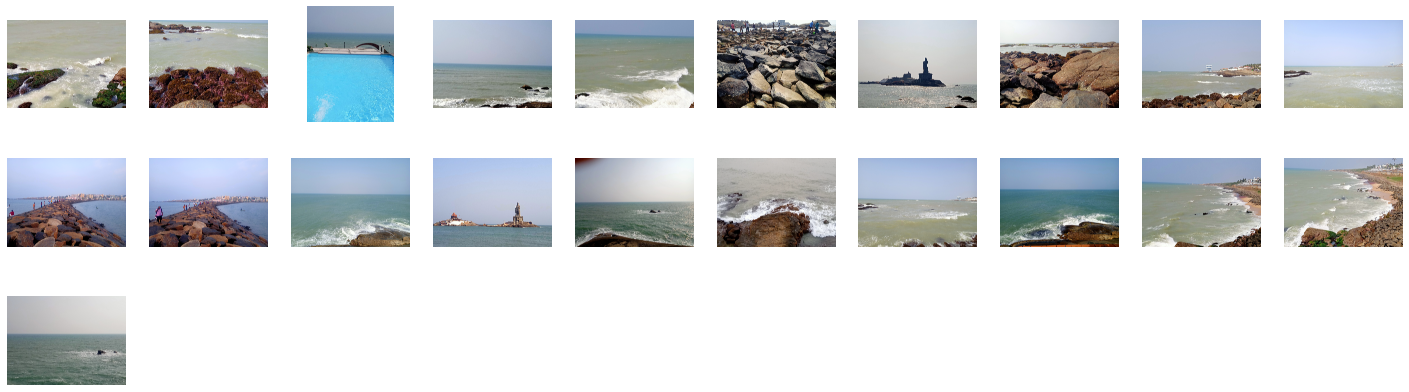

In [24]:
view_cluster(0)

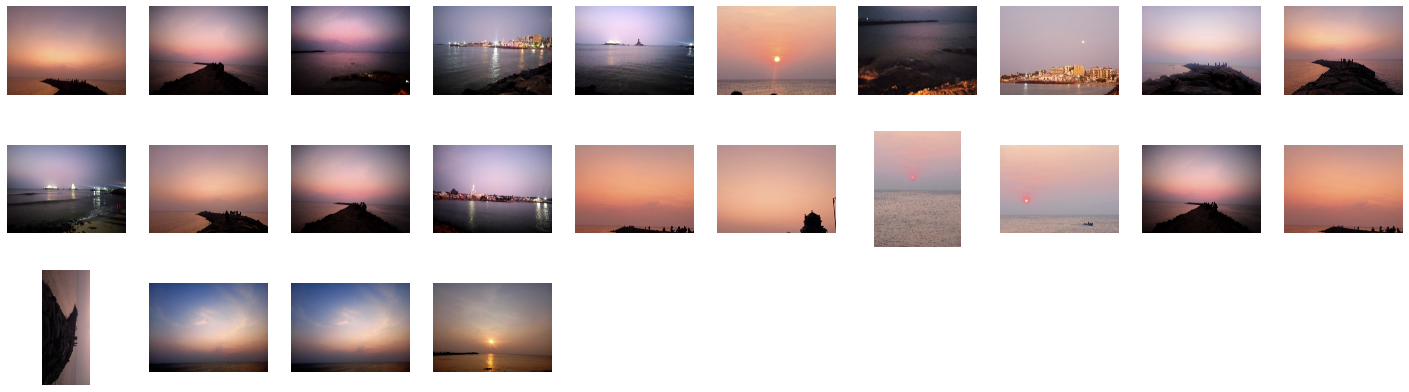

In [25]:
view_cluster(1)

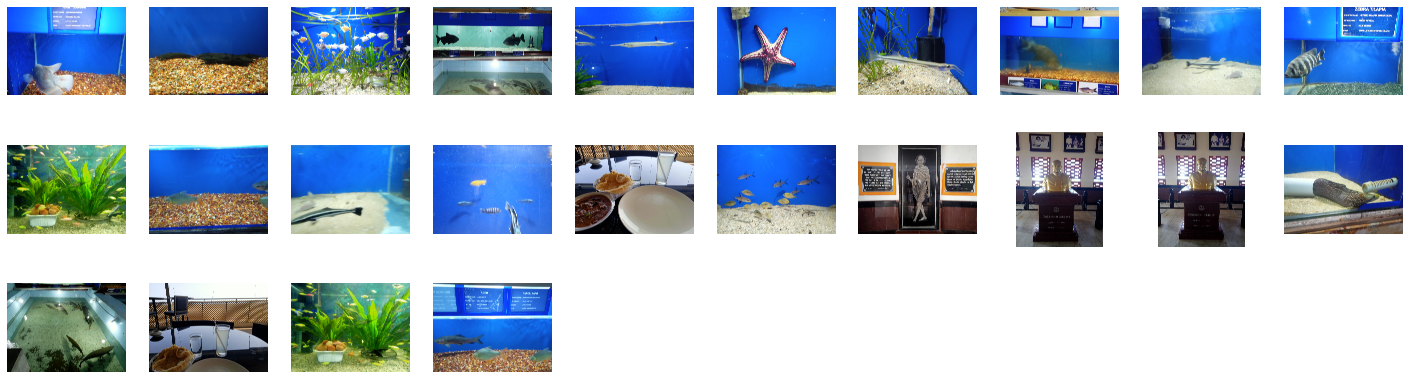

In [26]:
view_cluster(2)

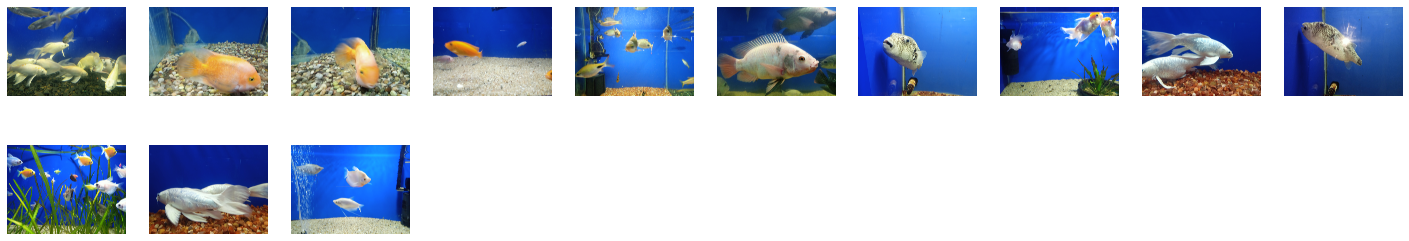

In [27]:
view_cluster(3)

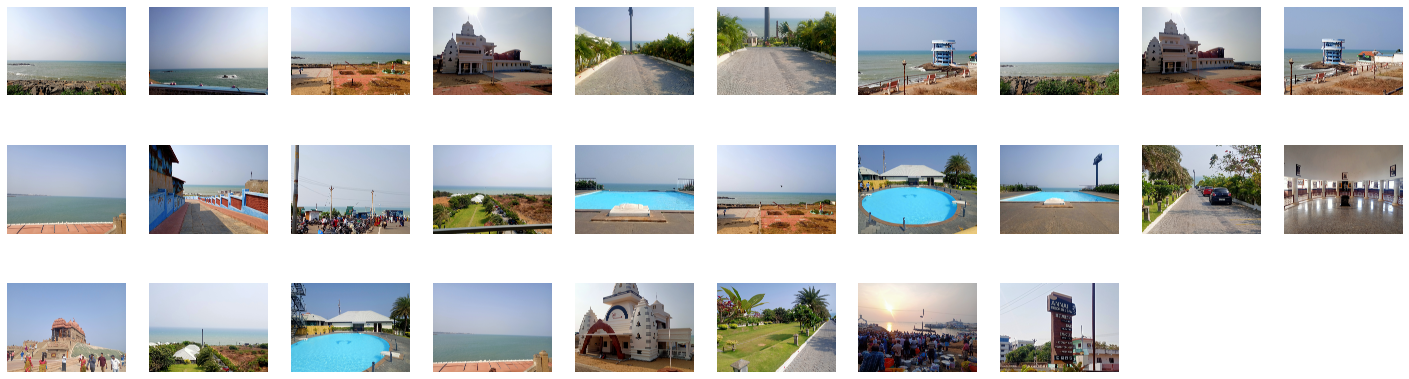

In [28]:
view_cluster(4)

In [29]:
import cv2
import numpy as np
  
# choose codec according to format needed
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
video = cv2.VideoWriter('video.avi', fourcc,fps = 1,frameSize = (256,256))

for j in range(0,len(images)):
  img = cv2.imread('/content/drive/MyDrive/Videos Travel'+images[j])
  video.write(img)

video.release()

In [30]:
video.release()